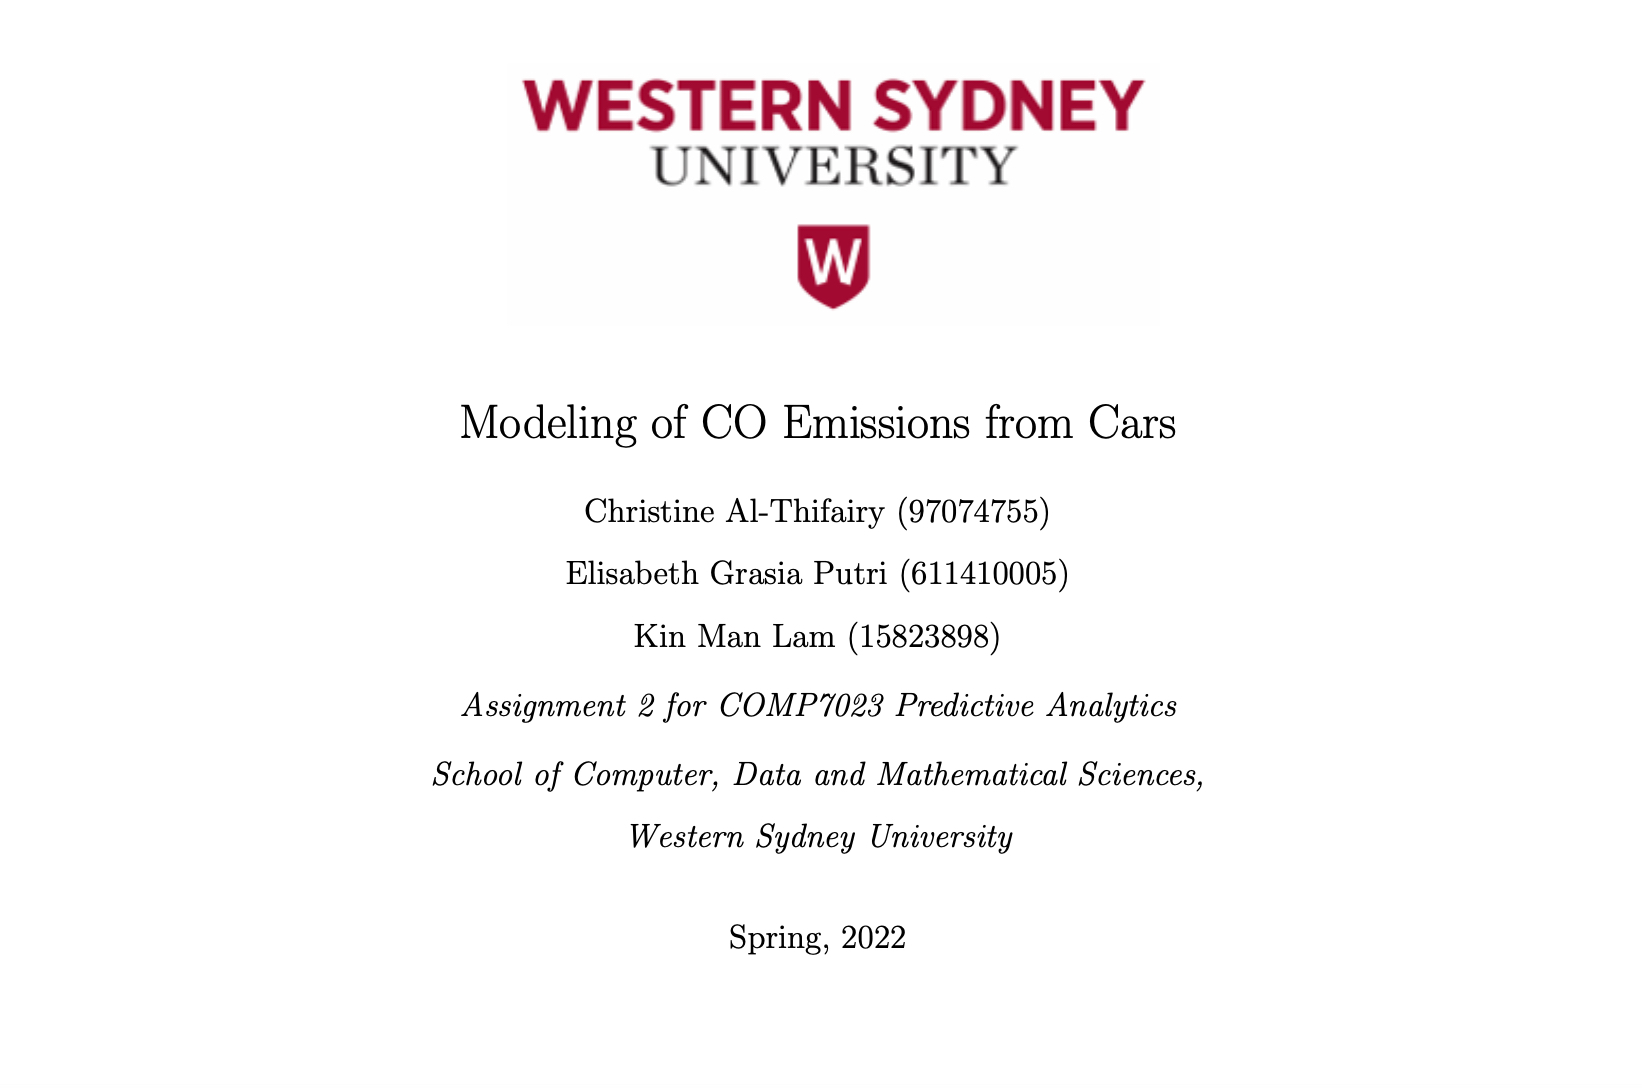

In [1]:
from IPython.display import Image
Image(filename='title.jpg',width=900) 

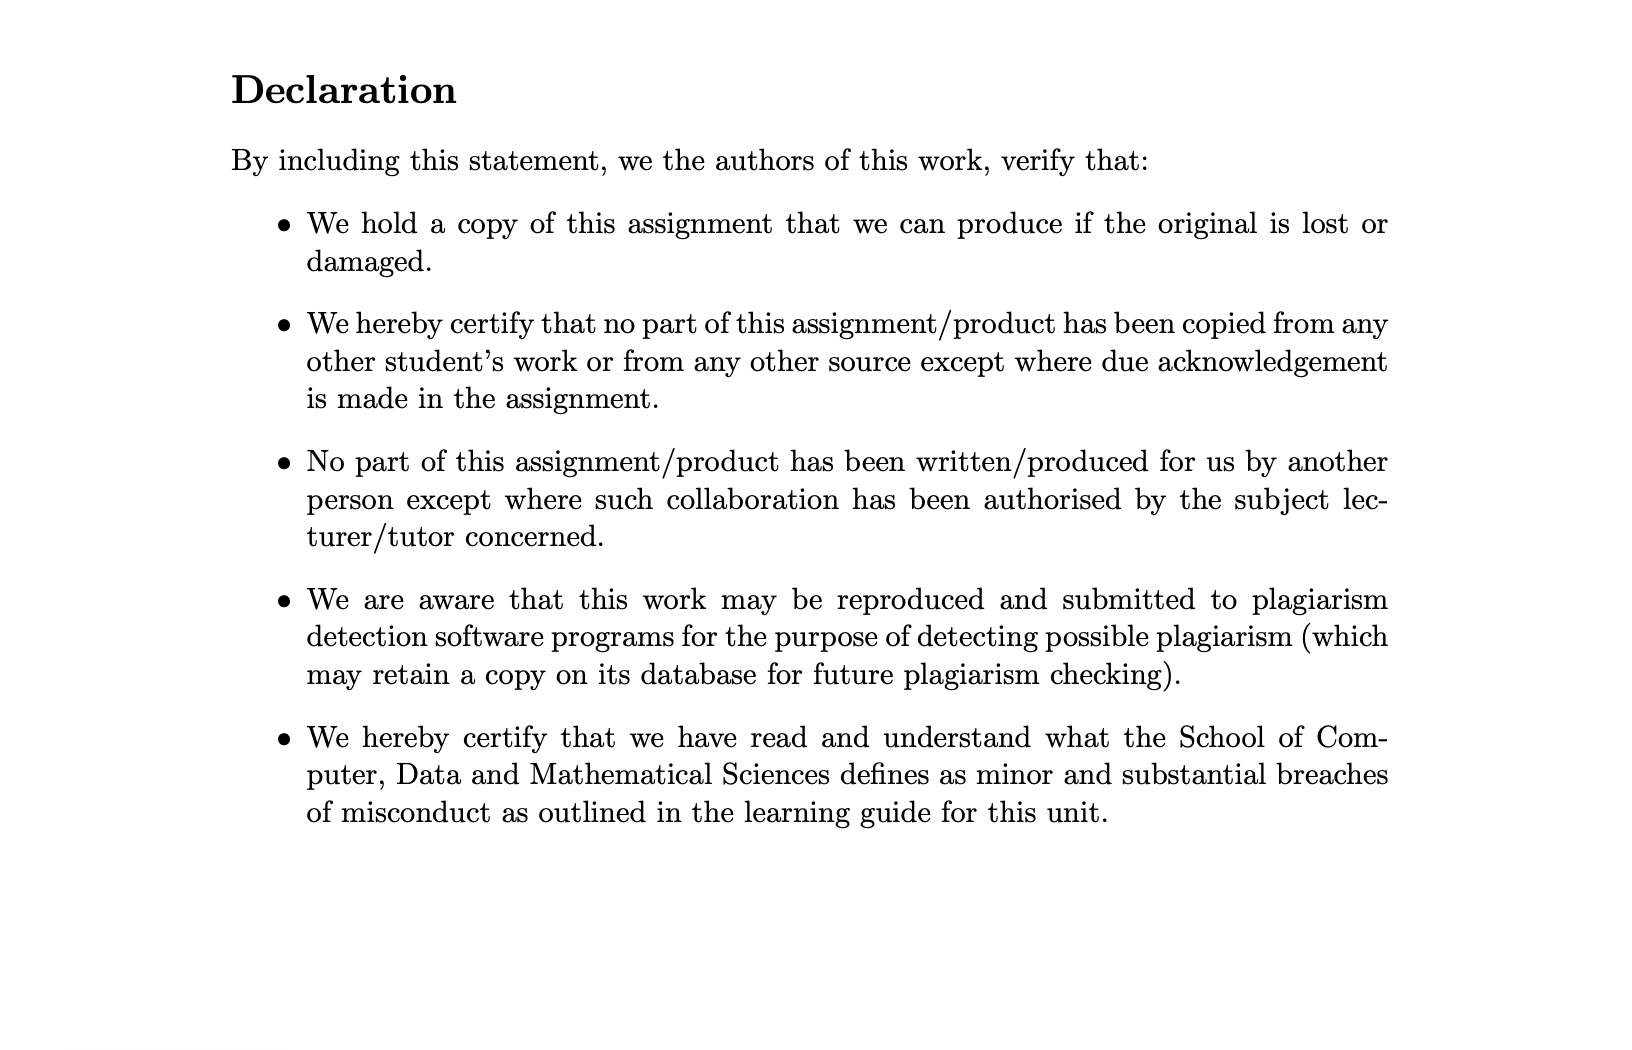

In [2]:
Image(filename='declar.jpg',width=900) 

UK government has a special concern regarding to the climate change. The goverment is commited to tackle this issue by limiting the emmisions of greenhouse gasses (GHG). One of the biggest gas emmisions in the world comes from transport area, mainly road transport. The internal combustion engine uses fuels, such as petrol, diesel, or any other alternatives; to be burned becoming energy. The combustion process produces gases and particulate matter (also called PM), which can be harmful to health. PM is also produced by tyre, brake and road wear. Moreover, there is either immediate or long term effects from poor roadside quality. The gas emissions, such as CO, NOx, or un-burnt HCs might not visible in the environment, as the modern car also should not emit any visible PM. The visible PM (i.e smoke) happens on deffected engine or filter faulty. 

It leads to a new official testing, Worldwide harmonised Light vehicles Test Procedure (WLTP), which is used to provide a broad information about fuel economy and air pollutant emissions. The emissions regulations in UK is called Euro 6. It requires to utilise a vehicle that has been altered with in a way that prevents it from meeting the air pollution emissions limitation. There is a potential penalty whenever breaking this rule. 

Until now, the action to reduce gas pollutant is still been developed in car manufacturers to meet the European Commission targets. This mission is to encourage moving on to ULEVS or more fuel-efficient conventional vehicles. UK government always gains data about this because of their concern of gas emmisions. The newest data can be accessed via [Vehicle Certification Agency / UK](https://carfueldata.vehicle-certification-agency.gov.uk/)  which is released on September 2022.

Carbon Monoxide (CO) is one of the most dangerous and poisoning gas emissions. It can bind with the red blood to reduce the oxygen level on the body. All of the vehicles testing also has concern to limit this gas. Therefore, we would like to analyse this data to predict about it. 

In this project, we use several methods of analysis such as Neural Network, Support Vector Machine(SVM), and Naive Bayes. We will do regression in Neural Network and classification on SVM and Naive Bayes. This report consists of data preprocessing, detailed methods analysis, and comparison between each of the methods. The type validation test is specifically done in each method (see the details in each section).

# 1- Data Preprocessing

Before we do any further analysis, we would like to do the data preprocessing. It is an important process as the raw data might contain errors, inconcistencies, incomplete, even not in regular and uniform design. Without data preprocessing, the raw data might lead into misprediction in each model.

In [1]:
# Importing the necessary function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

np.random.seed(42)

In [2]:
## Importing the data
df = pd.read_csv('Euro_6_latest.csv', delimiter=',', encoding='ISO-8859-1')

In [3]:
df.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Unnamed: 44
0,ABARTH,595,595 1.4 145 BHP Hatchback,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,08 September 2022,NaN
1,ABARTH,595,595 1.4 145 BHP Hatchback,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,08 September 2022,NaN
2,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,08 September 2022,NaN
3,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,08 September 2022,NaN
4,ABARTH,595,595 1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),NaN,107.0,...,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,08 September 2022,NaN


The function head can not display all the columns here. Thus, the data features checking is done by gathered the column's names below.

In [4]:
df.columns

Index(['Manufacturer', 'Model', 'Description', 'Transmission',
       'Manual or Automatic', 'Engine Capacity', 'Fuel Type', 'Powertrain',
       'Engine Power (PS)', 'Engine Power (Kw)',
       'Electric energy consumption Miles/kWh', 'wh/km', 'Maximum range (Km)',
       'Maximum range (Miles)', 'Euro Standard', 'Diesel VED Supplement',
       'Testing Scheme', 'WLTP Imperial Low', 'WLTP Imperial Medium',
       'WLTP Imperial High', 'WLTP Imperial Extra High',
       'WLTP Imperial Combined', 'WLTP Imperial Combined (Weighted)',
       'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High',
       'WLTP Metric Extra High', 'WLTP Metric Combined',
       'WLTP Metric Combined (Weighted)', 'WLTP CO2', 'WLTP CO2 Weighted',
       'Equivalent All Electric Range Miles',
       'Equivalent All Electric Range KM', 'Electric Range City Miles',
       'Electric Range City Km', 'Emissions CO [mg/km]',
       'THC Emissions [mg/km]', 'Emissions NOx [mg/km]',
       'THC + NOx Emissions [m

In [5]:
df['Euro Standard'].unique()

array(['Euro 6d-TEMP', 'Euro 6d', 'Euro 6-WLTP (for BEVs only)',
       'Euro 6c'], dtype=object)

In [6]:
df['Testing Scheme'].unique()

array(['WLTP'], dtype=object)

As mentioned above, the data features are all related to the details about vehicles. The vehicle's basic things, which can be known without further observation by WLTP method, are displayed. Those are including manufacturer, model, description, transmission, manual or automatic, engine capacity, fuel type, powertrain, engine power (PS), engine power (kW), electric energy consumption (Miles/ kWh), wh/km, maximum range (km), and maximum range (miles).

Each of the vehicles are required to fullfil a specific standard. Basically, all the vehicles should follow the Euro 6 standard. However, it become more specific into few types of vehicles.

All the test are done by WLTP method (known by checking Testing Scheme feature). The fuel consumption under WLTP are obtained under specific test conditions. The WLTP data is most likely similar as the reality because it is developed by real-driving data (although this test is done in laboratory). WLTP driving cycle is divided into four parts in different speeds: low, medium, high, and extra high. It is developed to be used world-wide, thus the pollutant, CO emissions, and fuel consumption values are compared. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Manufacturer                           4657 non-null   object 
 1   Model                                  4657 non-null   object 
 2   Description                            4657 non-null   object 
 3   Transmission                           4447 non-null   object 
 4   Manual or Automatic                    4657 non-null   object 
 5   Engine Capacity                        4655 non-null   float64
 6   Fuel Type                              4657 non-null   object 
 7   Powertrain                             4657 non-null   object 
 8   Engine Power (PS)                      4436 non-null   float64
 9   Engine Power (Kw)                      4568 non-null   float64
 10  Electric energy consumption Miles/kWh  1465 non-null   float64
 11  wh/k

By checking the dataset, it displays that there is no null value in each feature. The dataset consists of 4657 samples. However, there are several features that only have less than the maximum samples. This leads to the further process which is remove the column as feature for model prediction.

Removing the column has several considerations to be done. The first column removal is for the column which unnamed and does not have any value. There are several features which have more than 70% missing values. These are potentially decreasing the model prediction accuracy. Henceforth, we decided to remove it as well.

In [8]:
# Remove a column called Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove features with more than 70% missing values
limitPer = len(df) * .70
df = df.dropna(thresh=limitPer, axis=1).copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Manufacturer                       4657 non-null   object 
 1   Model                              4657 non-null   object 
 2   Description                        4657 non-null   object 
 3   Transmission                       4447 non-null   object 
 4   Manual or Automatic                4657 non-null   object 
 5   Engine Capacity                    4655 non-null   float64
 6   Fuel Type                          4657 non-null   object 
 7   Powertrain                         4657 non-null   object 
 8   Engine Power (PS)                  4436 non-null   float64
 9   Engine Power (Kw)                  4568 non-null   float64
 10  Euro Standard                      4657 non-null   object 
 11  Diesel VED Supplement              4657 non-null   bool 

After deleting the samples, now there are still 31 columns of feature. We will take out less impact features for CO model prediction.

In [10]:
%%html
<style>
  xtable {margin-left: 0 !important;}
  table.a td, table.a th {text-align: left !important}
  table.a th:first-child, table.a td:first-child {width: 25%}
</style>

Here are the considerations about dropping each column

<table class="a">
    <tr><th>Columns</th><th>Reason<th/></tr>
    <tr>
        <td>Transmission</td>
        <td>
This is a low-level category of car transmissions with 39 categories. This feature is a data redundancy. We rather to use the high-level category, 'Manual or Automatic', instead.
        </td>
    </tr>
    <tr>
        <td>Euro Standard<br/>Testing Scheme<br/>Date of change</td>
        <td>There is no point to compare the Euro Standard and Testing scheme as all the vehicles are threated similar. Date of change is also not relevant into $CO_2$ emissions.</td>
    </tr>
    <tr>
        <td>
            WLTP Imperial Low<br/>
            WLTP Imperial Medium<br/>
            WLTP Imperial High<br/>
            WLTP Imperial Extra High<br/>
            WLTP Imperial Combined<br/>
            WLTP Imperial Combined (Weighted)
        </td>
        <td>We decided to use the WLTP metrics only to reduce data confusion.</td>
    </tr>
    <tr>
        <td>Diesel VED Supplement</td><td>This feature is not general, only for diesel vehicle, which can lead to less accurate prediction.</td>
    </tr>
    <tr>
        <td>
            Emissions NOx [mg/km]<br/>
            THC Emissions [mg/km]<br/>
            Noise Level dB(A)
        </td>
        <td>
            Although these are also emissions, they do not give any impact into $CO_2$ emissions.
        </td>
    </tr>
</table>

In [11]:
# drop unnecessary columns
df = df.drop(['Transmission','Euro Standard','Testing Scheme','Date of change','WLTP Imperial Low',
               'WLTP Imperial Medium','WLTP Imperial High','WLTP Imperial Extra High',
               'WLTP Imperial Combined','WLTP Imperial Combined (Weighted)' ,
                'Diesel VED Supplement','Emissions NOx [mg/km]',
               'THC Emissions [mg/km]','Noise Level dB(A)'], axis=1).copy()

In [12]:
df.head()

,Manufacturer,Model,Description,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,WLTP CO2 Weighted,Emissions CO [mg/km]
0,ABARTH,595,595 1.4 145 BHP Hatchback,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,10.3,6.7,6.0,7.3,7.2,NaN,162.0,NaN,760.0
1,ABARTH,595,595 1.4 145 BHP Hatchback,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,10.4,6.6,6.5,8.2,7.6,NaN,169.0,NaN,760.0
2,ABARTH,595,595 1.4 145 BHP Convertible,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,10.3,6.7,6.0,7.3,7.2,NaN,162.0,NaN,760.0
3,ABARTH,595,595 1.4 145 BHP Convertible,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,10.4,6.6,6.5,8.2,7.6,NaN,169.0,NaN,760.0
4,ABARTH,595,595 1.4 TJET 145bhp,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),NaN,107.0,9.5,6.1,5.8,7.0,6.8,NaN,153.0,NaN,829.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Manufacturer                     4657 non-null   object 
 1   Model                            4657 non-null   object 
 2   Description                      4657 non-null   object 
 3   Manual or Automatic              4657 non-null   object 
 4   Engine Capacity                  4655 non-null   float64
 5   Fuel Type                        4657 non-null   object 
 6   Powertrain                       4657 non-null   object 
 7   Engine Power (PS)                4436 non-null   float64
 8   Engine Power (Kw)                4568 non-null   float64
 9   WLTP Metric Low                  4652 non-null   float64
 10  WLTP Metric Medium               4652 non-null   float64
 11  WLTP Metric High                 4652 non-null   float64
 12  WLTP Metric Extra Hi

After sorting the features, now we only have 18 features to be processed further.

### Merging Low-Level Categories to Upper-Level Categories

To simplify the encoding process and reduce number of columns, we are going to modify few labels in <i>Manual or Automatic, Fuel Type</i> and <i>Powertrain</i> columns.<br/>

In [14]:
print(df['Manual or Automatic'].unique())

AUTOMATIC = "Automatic"
MANUAL = "Manual"
ELECTRIC = "Electric"
df.loc[df['Manual or Automatic'].str.startswith('A'),'Transmission'] = AUTOMATIC
df.loc[df['Manual or Automatic'].str.startswith('M'),'Transmission'] = MANUAL
df.loc[df['Manual or Automatic'].str.startswith('E'),'Transmission'] = ELECTRIC

['Manual' 'Automatic' 'Electric - Not Applicable']


The data shows that there is a column name which is not effective, 'Manual or Automatic'. Regarding to this, we will change the name into Transmision. Also, we change the value 'Electric - Not Applicable' into 'Electric' to make it more compact.

In [15]:
print(df['Fuel Type'].unique(),'\n')
print(df['Powertrain'].unique())

['Petrol' 'Diesel' 'Electricity / Petrol' 'Petrol Electric' 'Electricity'
 'Petrol / LPG' 'Diesel Electric' 'Electricity / Diesel'] 

['Internal Combustion Engine (ICE)'
 'Plug-in Hybrid Electric Vehicle (PHEV)'
 'Mild Hybrid Electric Vehicle (MHEV)'
 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'
 'Hybrid Electric Vehicle (HEV)' 'Micro Hybrid']


##### Fuel Type Column:
We rename the column <i>Fuel Type</i> into <i>Fuel</i>. The steps we do are creating the new column first, then move the original value into the new column. However, we also regroup the values as follows.

- Petrol, Petrol / LPG ---> Petrol
- Diesel ---> Diesel
- Electricity ---> Electric
- Electricity / Petrol, Petrol Electric, Diesel Electric, Electricity / Diesel ---> hybrid

##### Powertrain Column:
We also rename the column <i>Power Train</i> into <i>PT</i> by using the previous steps. Also, we regroup the original values in the new column.

- Internal Combustion Engine (ICE) ---> ICE
- Plug-in Hybrid Electric Vehicle (PHEV), Mild Hybrid Electric Vehicle (MHEV), Hybrid Electric Vehicle (HEV)','Micro Hybrid ---> Hybrid
- Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV) ---> EV<br/>



This labeling steps are purposely to create less verbos label.

In [16]:
petrol = ['Petrol','Petrol / LPG']
diesel = ['Diesel']
electric = ['Electricity']
hybrid = ['Electricity / Petrol','Petrol Electric','Diesel Electric','Electricity / Diesel']
#df = df.copy()
df.loc[df['Fuel Type'].isin(petrol), 'Fuel'] = 'Petrol'
df.loc[df['Fuel Type'].isin(diesel), 'Fuel'] = 'Diesel'
df.loc[df['Fuel Type'].isin(electric), 'Fuel'] = 'Electric'
df.loc[df['Fuel Type'].isin(hybrid), 'Fuel'] = 'Hybrid'

In [17]:
ice = ['Internal Combustion Engine (ICE)']
hybrid = ['Plug-in Hybrid Electric Vehicle (PHEV)',
          'Mild Hybrid Electric Vehicle (MHEV)',
          'Hybrid Electric Vehicle (HEV)','Micro Hybrid']
ev = ['Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)']

df.loc[df['Powertrain'].isin(ice), 'PT'] = 'ICE'
df.loc[df['Powertrain'].isin(ev), 'PT'] = 'EV'
df.loc[df['Powertrain'].isin(hybrid), 'PT'] = 'Hybrid'

And we drop the original columns Powertrain, Fuel Type, and Manual or Automatic.

In [18]:
# Drop the old columns
df = df.drop(['Powertrain','Fuel Type','Manual or Automatic'], axis=1)

And rename PT back to Powertrain

In [19]:
df.rename(columns={'PT':'Powertrain'}, inplace=True)

### Simple Statistic Evaluation About the Data

#### Mean and Standard Deviation

Note how each feature covers a very different range, therefore we need to normalise the dataset when building the prediction models.

In [20]:
df.describe().transpose()[['mean', 'std']]

,mean,std
Engine Capacity,1705.867240,913.328698
Engine Power (PS),175.873986,109.715981
Engine Power (Kw),132.061734,83.686176
WLTP Metric Low,8.173216,4.979219
WLTP Metric Medium,6.293121,4.834343
WLTP Metric High,5.760705,4.415736
WLTP Metric Extra High,6.934315,3.831511
WLTP Metric Combined,6.621715,4.103563
WLTP Metric Combined (Weighted),1.244271,11.920150
WLTP CO2,149.067454,61.068876


<AxesSubplot:>

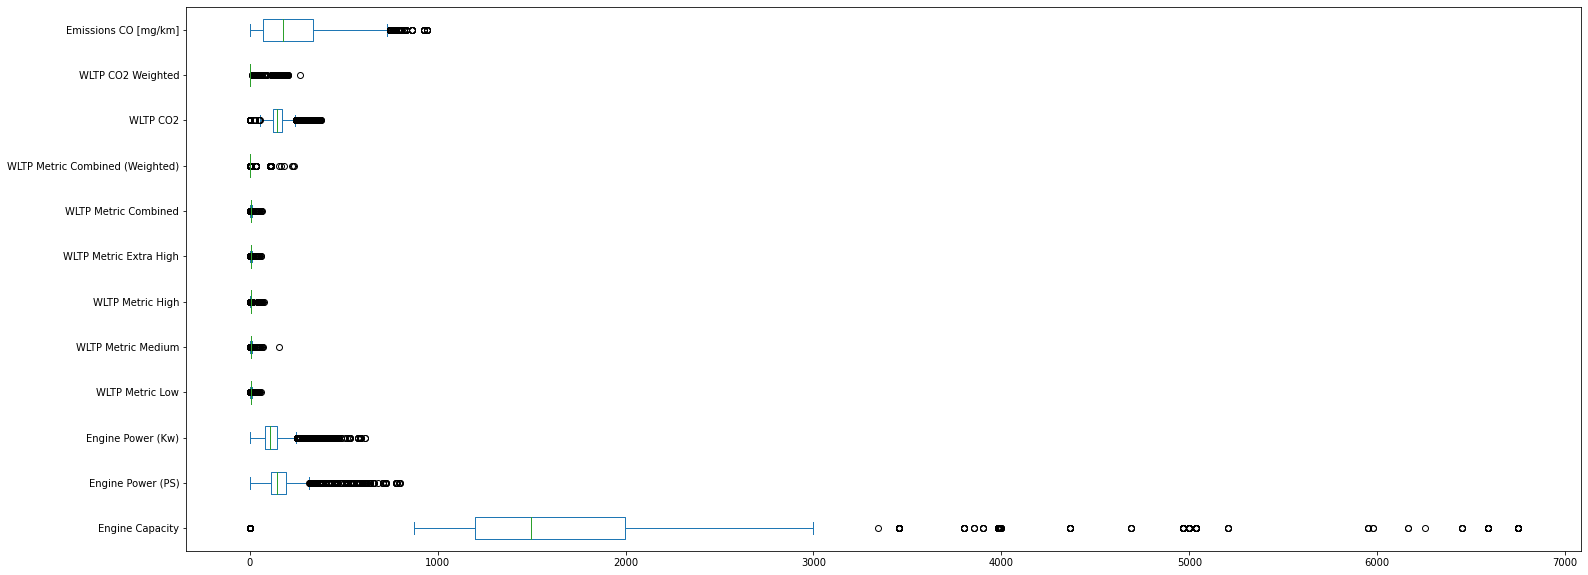

In [23]:
plt.rcParams["figure.figsize"] = (25,10)
df.plot.box(vert=False)

The box plot shows the distribution of numerical data values to be compared. Here is a broad information on the symmetry, skew, variance, and outliers of the dataset. From this, we can assume that the distribution of engine capacity distincts from the others.

### Handling Missing Values and Zeros

We check missing values in each of the remaining columns

In [22]:
for (columnName, columnData) in df.iteritems():
   print(columnName, ' Num of empty cells : ', columnData.isnull().sum())

Manufacturer  Num of empty cells :  0
Model  Num of empty cells :  0
Description  Num of empty cells :  0
Engine Capacity  Num of empty cells :  2
Engine Power (PS)  Num of empty cells :  221
Engine Power (Kw)  Num of empty cells :  89
WLTP Metric Low  Num of empty cells :  5
WLTP Metric Medium  Num of empty cells :  5
WLTP Metric High  Num of empty cells :  5
WLTP Metric Extra High  Num of empty cells :  6
WLTP Metric Combined  Num of empty cells :  15
WLTP Metric Combined (Weighted)  Num of empty cells :  1000
WLTP CO2  Num of empty cells :  2
WLTP CO2 Weighted  Num of empty cells :  1209
Emissions CO [mg/km]  Num of empty cells :  108
Transmission  Num of empty cells :  0
Fuel  Num of empty cells :  0
Powertrain  Num of empty cells :  0


<b>Engine Capacity</b> has two missing values which correspond to rows of Electic cars. Most likely because it is not applicable for Electric cars. So, we replace those missing values with zero.

In [25]:
df['Engine Capacity'] = df['Engine Capacity'].fillna(0)

<b>Engine Power (PS)</b> column has 221 missing values. We will use ffill (forward filling) and bfill (backward filling) per group to fill the missing values of Engine Power (PS). We group by car manufacturer and Model. So, the function will search for another car from same manufacturer and same model and has value in that column and copies that value to the other one with missing value.

<b>Engine Power (Kw)</b> has 89 missing values. We apply the same method above to fill the missing values.

In [26]:
df['Engine Power (PS)'] = df.groupby(['Manufacturer','Model'], sort=False) \
    ['Engine Power (PS)'].apply(lambda x: x.ffill().bfill())

# Same with Engine Power (Kw)
df['Engine Power (Kw)'] = df.groupby(['Manufacturer','Model'], sort=False) \
    ['Engine Power (Kw)'].apply(lambda x: x.ffill().bfill())

Some of the features has many zeros. For example, <i>WLTP Metric Combined (Weighted)</i> and <i>WLTP CO2</i>.<br/>

Let's count how many zeros in WLTP Metric Combined (Weighted) and WLTP CO2 Weighted columns

In [27]:
print('WLTP Metric Combined (Weighted) zeros =', len(df) - np.count_nonzero(df["WLTP Metric Combined (Weighted)"]))
print('WLTP CO2 Weighted zeros =', len(df) - np.count_nonzero(df["WLTP CO2 Weighted"]))

WLTP Metric Combined (Weighted) zeros = 3472
WLTP CO2 Weighted zeros = 3098


There are too many zeros values in both columns. So we are going to drop those 2 columns

In [28]:
df = df.drop(['WLTP Metric Combined (Weighted)','WLTP CO2 Weighted'], axis=1).copy()

For the rest of the features, we are going to fill missing values with mean of each column.<br>

We did not replace 0 values with the mean because that is not correct, for example electric cars may have 0 CO emissions.

In [29]:
df['WLTP Metric Combined'].fillna((df['WLTP Metric Combined'].mean()), inplace=True)
df['WLTP Metric Low'].fillna((df['WLTP Metric Low'].mean()), inplace=True)
df['WLTP Metric Medium'].fillna((df['WLTP Metric Medium'].mean()), inplace=True)
df['WLTP Metric High'].fillna((df['WLTP Metric High'].mean()), inplace=True)
df['WLTP Metric Extra High'].fillna((df['WLTP Metric Extra High'].mean()), inplace=True)
df['WLTP CO2'].fillna((df['WLTP CO2'].mean()), inplace=True)
df['Emissions CO [mg/km]'].fillna((df['Emissions CO [mg/km]'].mean()), inplace=True)
df.isnull().sum(axis = 0)

Manufacturer                0
Model                       0
Description                 0
Engine Capacity             0
Engine Power (PS)         177
Engine Power (Kw)          89
WLTP Metric Low             0
WLTP Metric Medium          0
WLTP Metric High            0
WLTP Metric Extra High      0
WLTP Metric Combined        0
WLTP CO2                    0
Emissions CO [mg/km]        0
Transmission                0
Fuel                        0
Powertrain                  0
dtype: int64

There are still 177 missing values in Engine Power (PS) and 89 in Engine Power (Kw). We looked at the original dataset csv file. It turns out those car models have no data. Therefore we are going to drop those models.

In [30]:
df = df.dropna().copy()

### Data Visualisation

#### a) Total Cars by Car Manufacturers

First we plot number of cars in the dataset by manufacturers and type of fuel. There are more models of some cars than others, especially the european models. It is obvious that Petrol still the dominant type of petrol. However, many car manufacturers are producing hybrid models.

C:\Users\alvak\AppData\Local\Temp\ipykernel_15344\4168477998.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


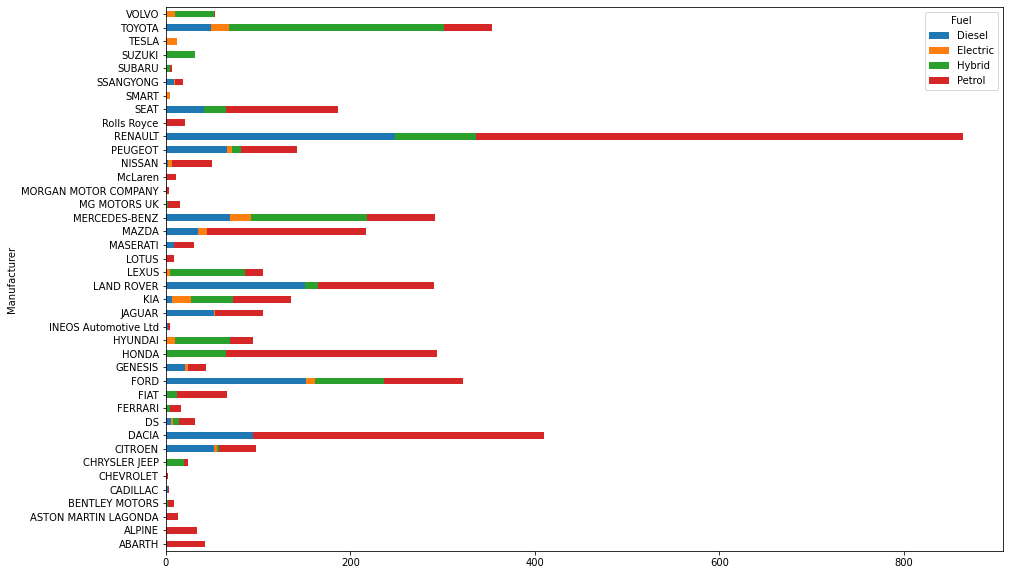

In [31]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
plt.rcParams["figure.figsize"] = (15,10)
cols = ['Manufacturer', 'Fuel']
df1 = df[cols].copy()
df1.groupby(['Manufacturer','Fuel']).size().unstack().plot(sort_columns='Manufacturer',
        kind='barh', stacked=True,width=0.5,linewidth=0.5);

#### b) CO Emission by Car Manufacturer

Next, we plot the CO emission value against each car. Some of the cars show higher than others. Sometimes, this is because of number of models used for each cars is higher than other.

Fiat and Lotus are generating more CO emission than other cars in the dataset.

##### Note: Nissan CO Emission figures are recorded as zero in the original dataset. 

Text(0.5, 0, 'Manufacturer')

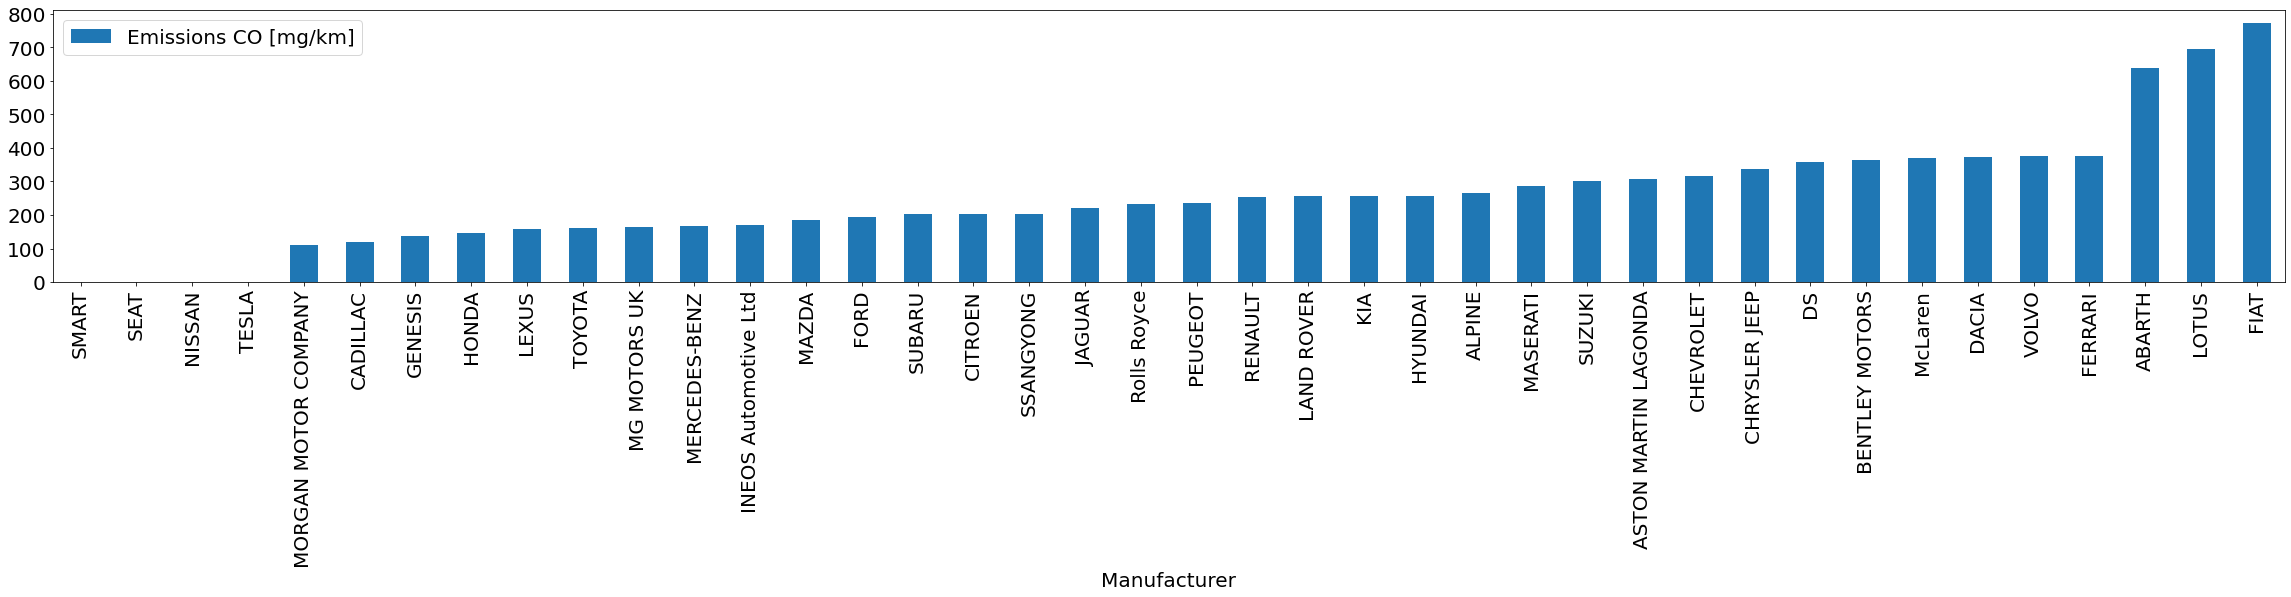

In [32]:
cols = ['Manufacturer', 'Emissions CO [mg/km]']
plt.rcParams["figure.figsize"] = (40,5)

df2 = df[cols].copy()
df2 = df2.groupby('Manufacturer', as_index=False)['Emissions CO [mg/km]'].mean()

df2.sort_values('Emissions CO [mg/km]',inplace=True)
df2.plot(kind='bar',x='Manufacturer',y='Emissions CO [mg/km]',fontsize=20)
plt.legend(fontsize = 20)
plt.xlabel('Manufacturer', fontsize=20)

#### c) Percentage of Cars by Fuel Type

About half of the cars in the dataset are running on petrol.

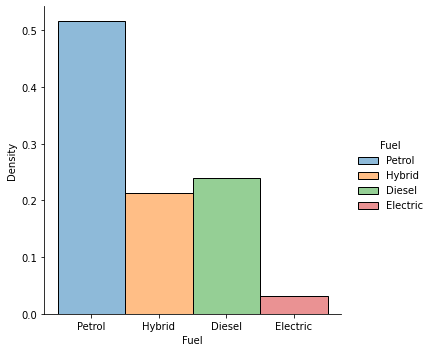

In [33]:
sns.displot(data=df1, x="Fuel",stat='density',kind='hist', hue=df['Fuel'])

#### d) Pairplot

Next, we look at the pairplot of some of the main features. It is clear that hybrid and electric cars act like outliners which is because of their low figures. Generally speaking, the dataset has many outliners.</br>

It is also clear petrol and diesel have higher WLTP figures than the rest.

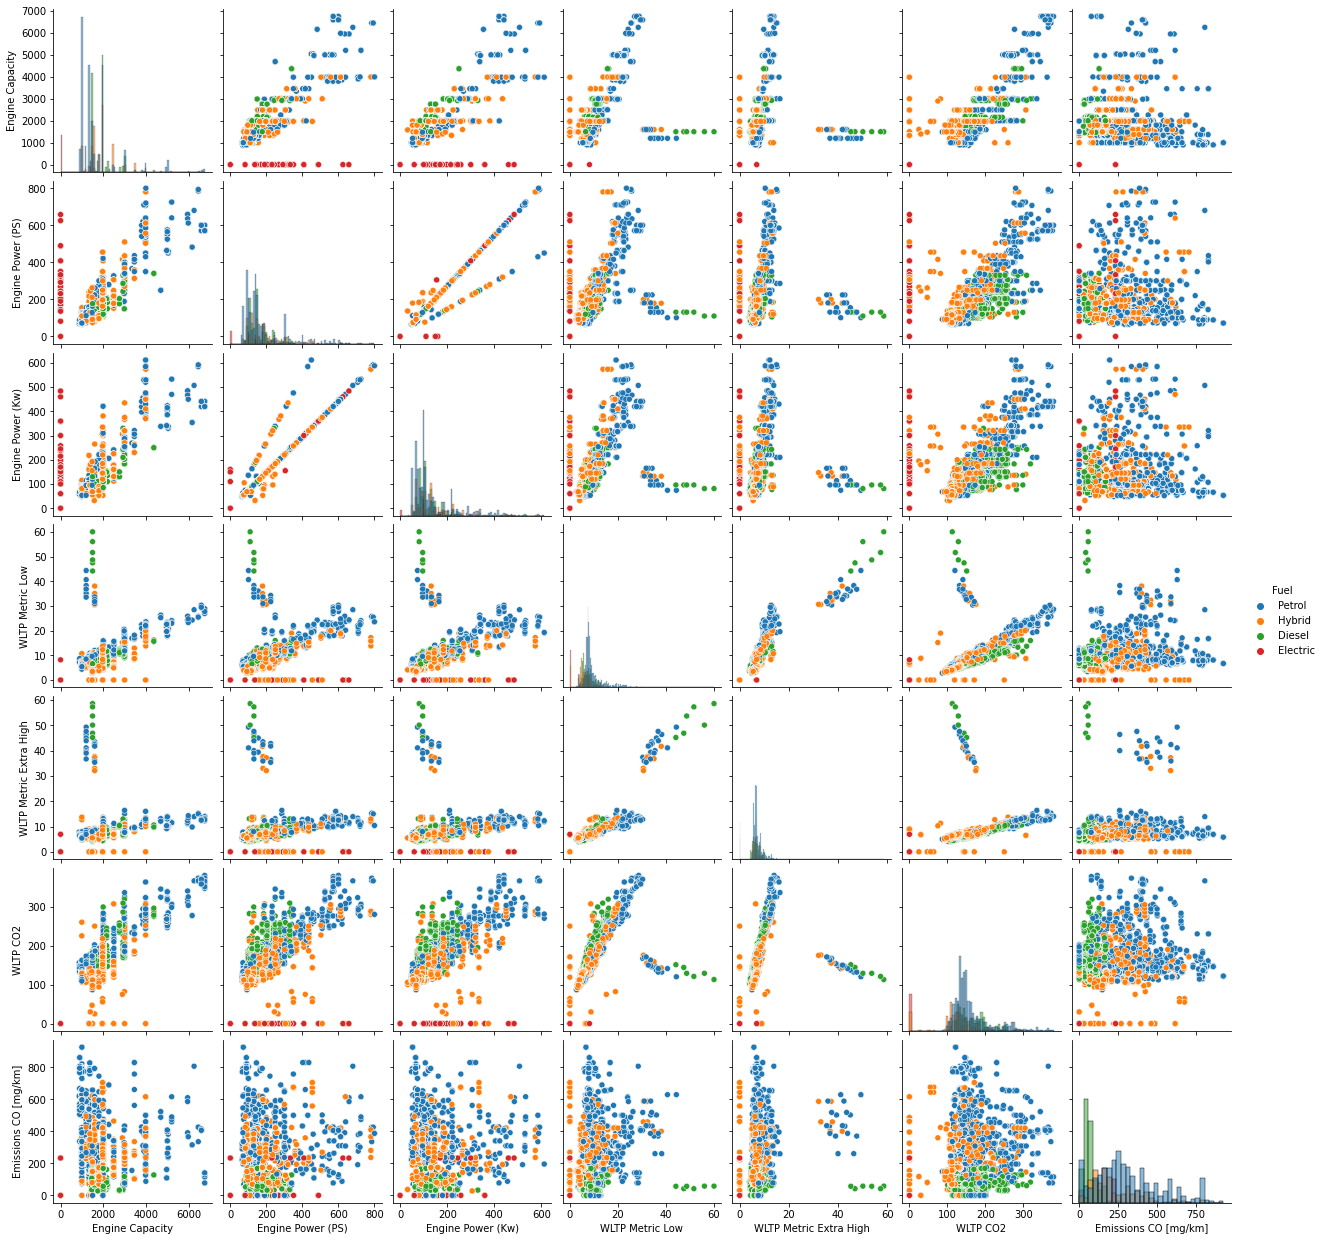

In [34]:
sns.pairplot(df,vars=['Engine Capacity','Engine Power (PS)','Engine Power (Kw)',
                      'WLTP Metric Low','WLTP Metric Extra High','WLTP CO2',
                      'Emissions CO [mg/km]'],hue='Fuel',
                       diag_kind='hist')

### Encoding

Let's look at the result df and see how many categorical features we have:

In [35]:
for column in df:
    print("{} | {} | {}".format(
        df[column].name, len(df[column].unique()), df[column].dtype
    ))

Manufacturer | 40 | object
Model | 305 | object
Description | 2138 | object
Engine Capacity | 88 | float64
Engine Power (PS) | 196 | float64
Engine Power (Kw) | 179 | float64
WLTP Metric Low | 240 | float64
WLTP Metric Medium | 168 | float64
WLTP Metric High | 132 | float64
WLTP Metric Extra High | 138 | float64
WLTP Metric Combined | 146 | float64
WLTP CO2 | 246 | float64
Emissions CO [mg/km] | 422 | float64
Transmission | 3 | object
Fuel | 4 | object
Powertrain | 3 | object


There are three categorical features that we are going to include in our analysis. These are:<br/>

- Transmission
- Fuel
- Powertrain

We are using get_dummies() for encoding those features.

We also going to drop Manufacturer, Model, and Description. They are not useful for prediction.

In [36]:
dummy_cols = ['Transmission','Fuel','Powertrain']
df_encode = pd.get_dummies(df, columns=dummy_cols).copy()
df_encode = df_encode.drop(['Manufacturer','Model','Description'], axis=1).copy()

First thing we want to do is see what data types do we have now:

In [37]:
df_encode.dtypes

Engine Capacity           float64
Engine Power (PS)         float64
Engine Power (Kw)         float64
WLTP Metric Low           float64
WLTP Metric Medium        float64
WLTP Metric High          float64
WLTP Metric Extra High    float64
WLTP Metric Combined      float64
WLTP CO2                  float64
Emissions CO [mg/km]      float64
Transmission_Automatic      uint8
Transmission_Electric       uint8
Transmission_Manual         uint8
Fuel_Diesel                 uint8
Fuel_Electric               uint8
Fuel_Hybrid                 uint8
Fuel_Petrol                 uint8
Powertrain_EV               uint8
Powertrain_Hybrid           uint8
Powertrain_ICE              uint8
dtype: object

# 2 - Neural Network Regression Model Section

Build the model using Keras is a deep learning API https://keras.io/<br/>

### Identify the input and target variables

Our target variable (y) is 'Emissions CO [mg/km]' which is continuous variable. So our NN model is regression.

We use all the numeric features for the prediction models as input variables or X.

In [38]:
X = df_encode.loc[:, df_encode.columns != 'Emissions CO [mg/km]']
print()
print('X or input variables are:')
print()
print(X.columns.tolist())
y =  df_encode['Emissions CO [mg/km]']


X or input variables are:

['Engine Capacity', 'Engine Power (PS)', 'Engine Power (Kw)', 'WLTP Metric Low', 'WLTP Metric Medium', 'WLTP Metric High', 'WLTP Metric Extra High', 'WLTP Metric Combined', 'WLTP CO2', 'Transmission_Automatic', 'Transmission_Electric', 'Transmission_Manual', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_Hybrid', 'Fuel_Petrol', 'Powertrain_EV', 'Powertrain_Hybrid', 'Powertrain_ICE']


### Spliting the data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

### Define Keras sequential model

The model is using build-in Adam() optimiser.<br/>
For measuring the losses, we use mean_square_error metrics.<br/>

We are using sklearn.preprocessing.StandardScaler library to scale our train and test data.<br/>

Our model has seven hidden layers and one output layer with linear activation function.

In [24]:
from keras.models import Sequential
#from keras import utils
import keras
from keras.layers import Dense, Activation
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.optimizers import SGD
from keras import initializers
from keras.layers import LeakyReLU

numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X_train_chris = X_train.select_dtypes(include=numerics).to_numpy()
X_test_chris = X_test.select_dtypes(include=numerics).to_numpy()
y_train_chris = Y_train.to_numpy()
y_test_chris = Y_test.to_numpy()

#Standard normalization
sc = StandardScaler()
X_train_chris = sc.fit_transform(X_train_chris)
X_test_chris = sc.transform(X_test_chris)
y_train_chris = sc.fit_transform(y_train_chris.reshape(len(y_train_chris),1))[:,0]
y_test_chris = sc.transform(y_test_chris.reshape(len(y_test_chris),1))[:,0]

dim = X_train_chris.shape[1]

# define the keras model
model = Sequential()

# First layer with inputs
model.add(Dense(64, input_shape=(dim,),activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Third hidden layer
model.add(Dense(132, activation='relu'))

# Fourth hidden layer
model.add(Dense(32)) 
model.add(LeakyReLU(alpha=0.1))

# Fifth hidden layer
model.add(Dense(32)) 
model.add(LeakyReLU(alpha=0.1))

# Sixth hidden layer
model.add(Dense(16)) 
model.add(LeakyReLU(alpha=0.1))

# Seventh hidden layer
model.add(Dense(4)) 
model.add(LeakyReLU(alpha=0.1))

# Output layer is linear
model.add(Dense(1, activation='linear'))

opt = keras.optimizers.Adam(learning_rate=0.001)
# compile the keras model with adam optimise

model.compile(loss='mean_squared_error', optimizer=opt , metrics='mean_squared_error')
model.summary()

ModuleNotFoundError: No module named 'keras'

### Fit the model

In [25]:
history = model.fit(X_train_chris, y_train_chris, 
        validation_data=(X_test_chris, y_test_chris), epochs=1200, verbose=0)

NameError: name 'model' is not defined

### Evaluate the model
We are using MSE as metric to measure the accurracy of our NN model.

In [ ]:
train_mse, train_accuracy = model.evaluate(X_train_chris, y_train_chris, verbose=0)
test_mse, test_accuracy = model.evaluate(X_test_chris, y_test_chris, verbose=0)
print('Train MSE: %.5f, Test MSE: %.5f' % (train_mse, test_mse))

### Plot train and test losses

In [ ]:
plt.figure(figsize=(14,4))
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.yticks(np.arange(0, np.max(history.history['loss'])+0.2, step=0.2))
plt.legend()
plt.show()

### Keras model evaluation

The Loss curves for both training and test data are fluctuating and not smooth. This could be because we have relatively small dataset and little large network (13,629 parameters).<br/>

Our train MSE is on average 1% while the test MSE is 8%-17%. It is normal to training MSE lower than test MSE.<br/>

This model prediction accuracy is very high and therefore it is a good model.

# 3 - SVM Model

We build a binary classification model to predict if the car produce high or low CO emission.</br>

The new binary target classes are 0 or 1. Any sample data above the mean of the original target will belong to class 0 and considered as high (bad). On the other hands, those below its mean are 1 and considered as low (good).

In [41]:
# Mean of the target value.
m = df_encode['Emissions CO [mg/km]'].mean() 

# make a copy of df_encode
df_svm = df_encode.copy()
df_svm['Target'] = (df_svm['Emissions CO [mg/km]'] <= m).astype('int64')

### Plot Percentages of Classes

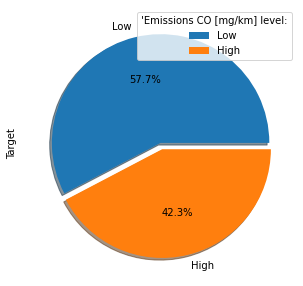

In [42]:
df_svm['Target'].value_counts() / df_svm['Target'].count()
y_labels = ["Low", "High"]
df_svm['Target'].value_counts().plot.pie(explode=[0, 0.06], 
                                         figsize=(5,5), 
                                         labels = y_labels, 
                                         autopct = '%1.1f%%', shadow=True)
# The pie plot shows proportion of each class of the target value.
plt.legend(title = "'Emissions CO [mg/km] level:") 

### Define Inputs and Target Variables

Our target variable is the new feature Target which contains 2 classes 0 and 1.<br/>
All other numeric features are our input variables.


In [43]:
y_2 = df_svm['Target']
X_2 = df_svm.drop(['Emissions CO [mg/km]','Target'],axis=1).copy()
print('Our SVM Input Features\n')
X_2.dtypes

Our SVM Input Features



Engine Capacity           float64
Engine Power (PS)         float64
Engine Power (Kw)         float64
WLTP Metric Low           float64
WLTP Metric Medium        float64
WLTP Metric High          float64
WLTP Metric Extra High    float64
WLTP Metric Combined      float64
WLTP CO2                  float64
Transmission_Automatic      uint8
Transmission_Electric       uint8
Transmission_Manual         uint8
Fuel_Diesel                 uint8
Fuel_Electric               uint8
Fuel_Hybrid                 uint8
Fuel_Petrol                 uint8
Powertrain_EV               uint8
Powertrain_Hybrid           uint8
Powertrain_ICE              uint8
dtype: object

### Splitting the Dataset into Train and Test

Split train set and test set into 80% to 20%.

In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=.2, random_state = 50)


### Build SVM Model

We are using MinMaxScaler for normalisation of both train and test data.</br>


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

#MinMax normalization
scaler = MinMaxScaler()

# Scalling the data
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

Check feature scalling

In [46]:
df_describe_2 = pd.DataFrame(X_train_2)
df_describe_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,3573.0,0.258063,0.131438,0.0,0.197066,0.236776,0.295896,1.0
1,3573.0,0.220430,0.136284,0.0,0.142500,0.181250,0.250000,1.0
2,3573.0,0.216014,0.136122,0.0,0.137255,0.174837,0.240196,1.0
3,3573.0,0.148184,0.087956,0.0,0.106952,0.135472,0.163993,1.0
4,3573.0,0.101402,0.069361,0.0,0.077901,0.092210,0.111288,1.0
5,3573.0,0.082307,0.063586,0.0,0.064426,0.075630,0.088235,1.0
6,3573.0,0.123290,0.067509,0.0,0.102967,0.116928,0.137871,1.0
7,3573.0,0.110240,0.067885,0.0,0.086601,0.102941,0.119281,1.0
8,3573.0,0.402077,0.154681,0.0,0.336870,0.384615,0.464191,1.0
9,3573.0,0.620767,0.485264,0.0,0.000000,1.000000,1.000000,1.0


Now we have the data ready for the model.<br/>

Create a SVM classifier and use linear as kernel as it is the most common one. 
First we make prediction with train data, and we also going to look at the accuracy of the model by printing the metrics report and the confusion matrix.

Train Score: 0.774972223526282
confusion_matrix: [[1269  247]
 [ 550 1507]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1516
           1       0.86      0.73      0.79      2057

    accuracy                           0.78      3573
   macro avg       0.78      0.78      0.78      3573
weighted avg       0.79      0.78      0.78      3573



C:\Users\alvak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


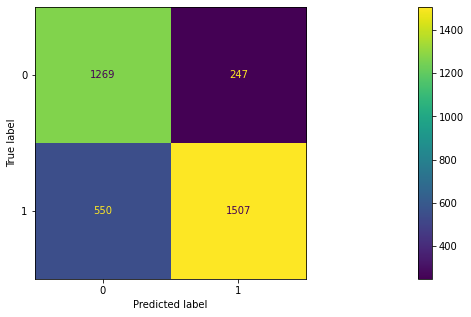

In [47]:
svm_1 = svm.SVC(kernel='linear',C=1)

# Fit the model
svm_1.fit(X_train_2, y_train_2) 

# Make predictions on train dataset
y_pred_2 = svm_1.predict(X_train_2)

# Accuracies of the model. 10-fold cross validation is used here.
accuracies = cross_val_score(svm_1, X_train_2, y_train_2, cv=10) 
print("Train Score:", np.mean(accuracies)) 
print("confusion_matrix:", confusion_matrix(y_train_2, y_pred_2))
print(metrics.classification_report(y_train_2, y_pred_2, digits=2))
plot_confusion_matrix(svm_1, X_train_2, y_train_2) 
plt.show()

Average score for training data is 77%.<br/>
Precision figure for class 0 is 70% and for class 1 is 86% which is not bad. Out of 1516 sample with class 0, 1269 are correct and out of 2057 of class 1, 1507 are correct.<br/>

Let's test accuracy with test dataset.

Test Score: 0.7393008739076155
confusion_matrix: [[314  60]
 [148 372]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       374
           1       0.86      0.72      0.78       520

    accuracy                           0.77       894
   macro avg       0.77      0.78      0.77       894
weighted avg       0.79      0.77      0.77       894



C:\Users\alvak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


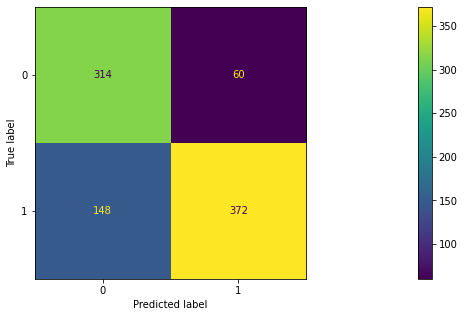

In [48]:
y_pred_3 = svm_1.predict(X_test_2)

#Accuracies of the model. 10-fold cross validation is used here.
accuracies2 = cross_val_score(svm_1, X_test_2, y_test_2, cv=10) 
print("Test Score:", np.mean(accuracies2)) 
print("confusion_matrix:", confusion_matrix(y_test_2, y_pred_3))
print(metrics.classification_report(y_test_2, y_pred_3, digits=2))
plot_confusion_matrix(svm_1, X_test_2, y_test_2) 
plt.show()

Average score of test data is 73% which is less than training data. It is normal to have less test score than train score.

precision figures are close with 68% for class 0 and 86% for class 1.<br/>

The score is not that great and that could be because there are many outliners in our dataset as you can see from the pairplot figure above.

We are going to use GridSearchCV to find the best hyperparameters C, kernel, degree, and gamma.

### GridSearchCV 

GridSearchCV is used here to search the best parameters for the SVM model.

In [ ]:
grid = {
    'C':[0.01, 0.1 ,1, 10],
    'kernel' : ["poly", "rbf", "sigmoid"],
    'degree' : [7],
    'gamma' : [0.01, 1]
}

svm_2  = SVC(random_state = 125)
svm_cv = GridSearchCV(svm_2, grid, cv = 10)
svm_cv.fit(X_train_2, y_train_2)

print("Best Parameters:", svm_cv.best_params_)
print("Accuracy on train data", svm_cv.best_score_)
# Print the accuracy on the test data 
print("Accuracy on test data:", svm_cv.score(X_test_2, y_test_2))

We use the best parameters for prediction and print the classification report.

In [ ]:
grid_predictions = svm_cv.predict(X_test_2)

print(classification_report(y_test_2, grid_predictions))

The precision figures for both classes are better than the linear SVM model. Class 0 was 68% now it is 82%. Class 1 was 86% and now it is 92%.

Use best parameters for prediction

In [ ]:
svm_3 = SVC(kernel='poly', degree=7, gamma=1, C=10)
svm_3.fit(X_train_2, y_train_2)
y_pred_2_1 = svm_3.predict(X_test_2)

print("Test Accuracy:\n", accuracy_score(y_test_2, y_pred_2_1))
print("confusion_matrix:\n", confusion_matrix(y_test_2, y_pred_2_1))
print(metrics.classification_report(y_test_2, y_pred_2_1, digits=2))
plot_confusion_matrix(svm_3, X_test_2, y_test_2) 
plt.show()

Accuracy score for the new polynomial model has also improved. Out of 374 data samples with class 0, only 37 were misclassified. And out of 520 sample with class 1, only 72 were wrongly classified as 0.

Overall, this binary SVM model is good and produces good results.

# 4 - Naive Bayes Method

# 5 - Method Comparison